# 3. Linear Models for Regression

original work by ctgk

https://github.com/ctgk/PRML/blob/master/notebooks/ch03_Linear_Models_for_Regression.ipynb

In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from prml.features import GaussianFeatures, PolynomialFeatures, SigmoidalFeatures

In [4]:
from prml.linear import (
    BayesianRegressor,
    LinearRegressor,
    RidgeRegressor,
)

In [5]:
np.random.seed(1234)

In [6]:
def create_toy_data(func, sample_size, std, domain=[0,1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

## 3.1 Linear Basis Function Models

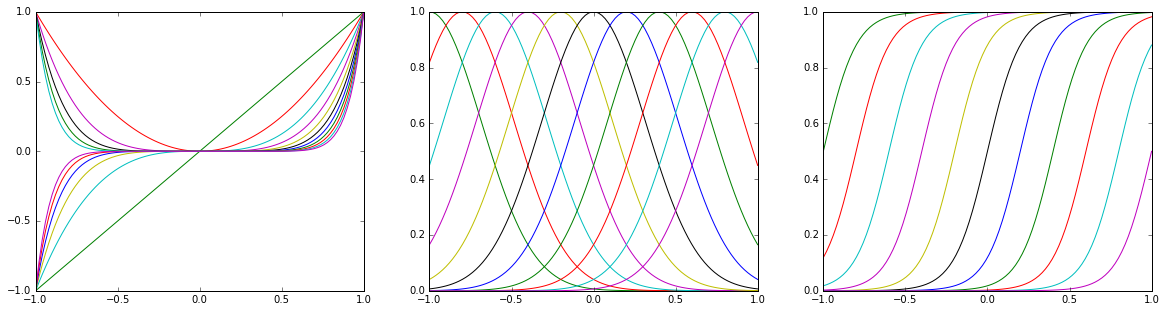

In [7]:
x = np.linspace(-1, 1, 100)
X_polynomial = PolynomialFeatures(degree=11).transform(x[:, None])
X_gaussian = GaussianFeatures(mean=np.linspace(-1,1, 11), var=0.1).transform(x)
X_sigmoidal = SigmoidalFeatures(mean=np.linspace(-1,1,11), coef=10).transform(x)

plt.figure(figsize=(20, 5))
for i, X, in enumerate([X_polynomial, X_gaussian, X_sigmoidal]):
    plt.subplot(1, 3, i+1)
    for j in range(12):
        plt.plot(x, X[:,j])

### 3.1.1 Maximum likelihood and least squares

In [8]:
def sinusoidal(x):
    return np.sin(2*np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, sample_size=100, std=0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

In [9]:
def predict(feature, x_train, x_test):
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    model = LinearRegressor()
    model.fit(X_train, y_train)
    y, y_std = model.predict(X_test, return_std=True)
    return y, y_std

In [10]:
def plot_prediction(x_train, x_test, y_train, y_test, y, y_std, title=None):
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
    plt.plot(x_test, y, label="prediction")
    plt.fill_between(x_test, y - y_std, y + y_std,
                color="orange", alpha=0.5, label="std.")
    plt.title(title)
    plt.legend()
    plt.show()

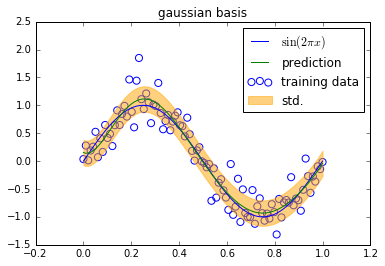

In [11]:
feature = GaussianFeatures(mean=np.linspace(0, 1, 8), var=0.1)
y, y_std = predict(feature, x_train, x_test)
plot_prediction(x_train, x_test, y_train, y_test, y, y_std, title="gaussian basis")

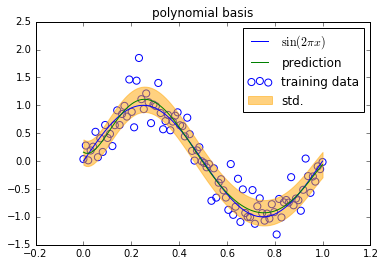

In [12]:
feature = PolynomialFeatures(degree=8)
y, y_std = predict(feature, x_train, x_test)
plot_prediction(x_train, x_test, y_train, y_test, y, y_std, title="polynomial basis")

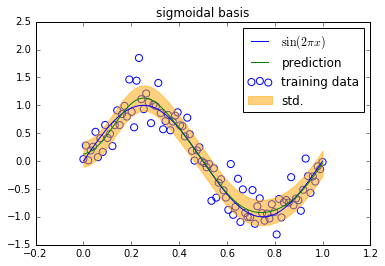

In [13]:
feature = SigmoidalFeatures(mean=np.linspace(0, 1, 8), coef=10)
y, y_std = predict(feature, x_train, x_test)
plot_prediction(x_train, x_test, y_train, y_test, y, y_std, title="sigmoidal basis")

### 3.1.4 Regularized least squares

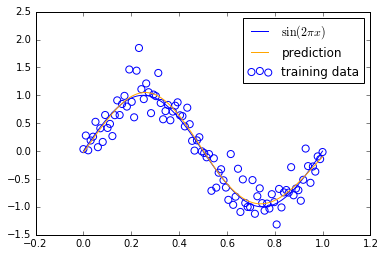

In [14]:
feature = GaussianFeatures(mean=np.linspace(0, 1, 8), var=0.1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)
model = RidgeRegressor(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y, label="prediction", color="orange")
plt.legend()
plt.show()

## 3.2 The Bias-Variance Decomposition

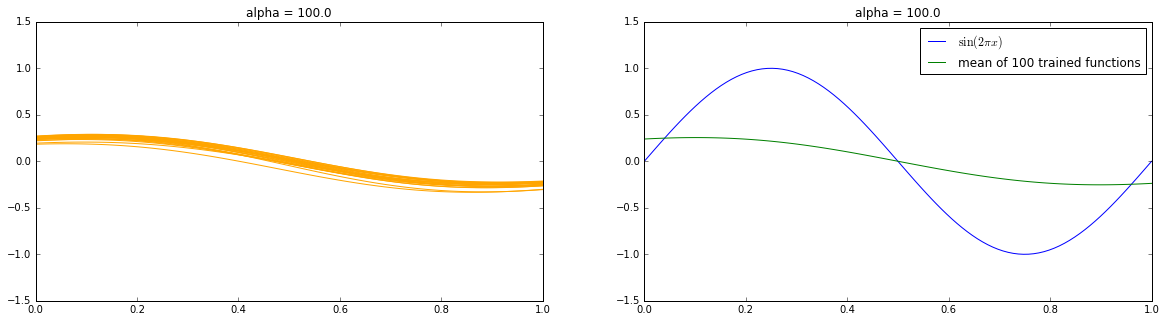

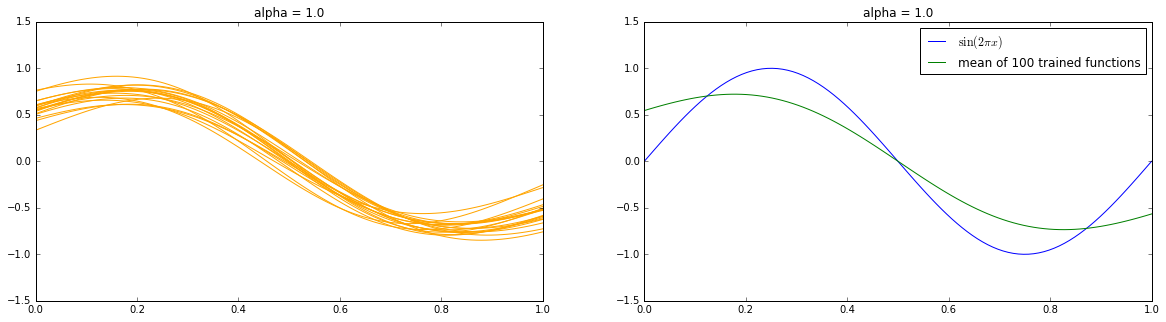

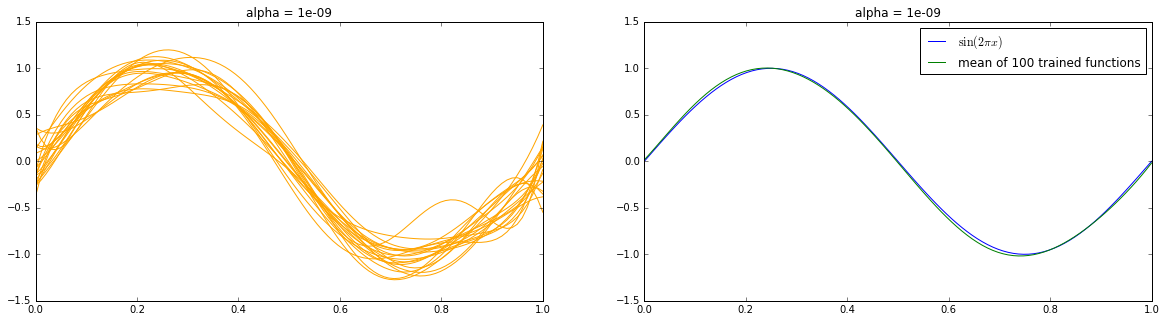

In [24]:
feature = GaussianFeatures(mean=np.linspace(0, 1, 24), var=0.1)

for a in [1e2, 1., 1e-9]:
    y_list = []
    plt.figure(figsize=(20, 5))
    plt.subplot(1,2,1)
    for i in range(100):
        x_train, y_train = create_toy_data(sinusoidal, 25, 0.25)
        X_train = feature.transform(x_train)
        X_test = feature.transform(x_test)
        model = BayesianRegressor(alpha=a, beta=1.)
        model.fit(X_train, y_train)
        y = model.predict(X_test)
        y_list.append(y)
        if i < 20:
            plt.plot(x_test, y, c="orange")
    plt.ylim(-1.5, 1.5)
    plt.title("alpha = {}".format(a))
    
    plt.subplot(1,2,2)
    plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
    plt.plot(x_test, np.asarray(y_list).mean(axis=0), label="mean of 100 trained functions")
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.title("alpha = {}".format(a))
    plt.show()